In [1]:
#1.Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
    
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import joblib

In [3]:
# 2.Load Dataset
df = pd.read_csv("C:/Users/jamun/Downloads/Loan_Approval_Prediction/loan_dataset.csv")
print("Initial Shape:", df.shape)
print(df.head())

Initial Shape: (614, 13)
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0     12800.0             360.0   
2             3000                0.0      6600.0             360.0   
3             2583             2358.0     12000.0             360.0   
4             6000                0.0     14100.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural          

In [4]:
# 3.Handle Missing Values

# Categorical → Mode
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Numerical → Median
numerical_cols = ['LoanAmount']
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\jamun\AppData\Local\Temp\ipykernel_22924\2948653847.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\jamun\AppData\Local\Temp\ipykernel_22924\2948653847.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [5]:
#4.Encode Categorical Variables

# Target encoding: Y=1, N=0
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# Label encode for binary categorical features
le = LabelEncoder()
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']:
    df[col] = le.fit_transform(df[col])

# Convert Dependents to numeric (replace '3+' with 3)
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

In [6]:
# 5.Feature & Target Split
X = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']


In [7]:
#6.Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
#7.Train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
#8.Model Training & Evaluation
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    print(f"\n{name}:")
    print(f"Accuracy: {acc:.4f}, ROC-AUC: {roc:.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression:
Accuracy: 0.8618, ROC-AUC: 0.7836
              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123


Random Forest:
Accuracy: 0.8293, ROC-AUC: 0.7746
              precision    recall  f1-score   support

           0       0.77      0.63      0.70        38
           1       0.85      0.92      0.88        85

    accuracy                           0.83       123
   macro avg       0.81      0.77      0.79       123
weighted avg       0.83      0.83      0.82       123


XGBoost:
Accuracy: 0.8130, ROC-AUC: 0.7701
              precision    recall  f1-score   support

           0       0.71      0.66      0.68        38
           1       0.85      0.88      0.87        85

    accuracy                    

C:\Users\jamun\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [00:35:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


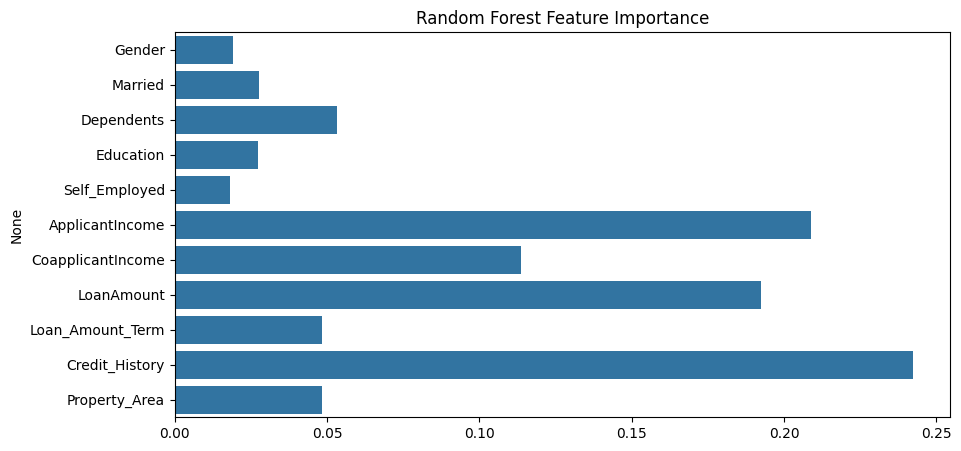

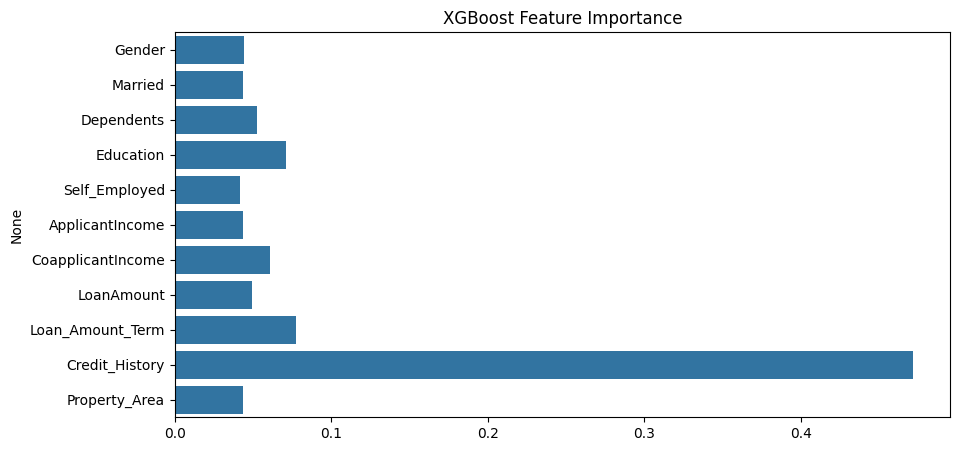

In [11]:
#9.Feature Importance (Random Forest & XGBoost)
rf_model = models["Random Forest"]
xgb_model = models["XGBoost"]

feature_names = X.columns
rf_importance = rf_model.feature_importances_
xgb_importance = xgb_model.feature_importances_

# Plot Feature Importance
plt.figure(figsize=(10,5))
sns.barplot(x=rf_importance, y=feature_names)
plt.title("Random Forest Feature Importance")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x=xgb_importance, y=feature_names)
plt.title("XGBoost Feature Importance")
plt.show()


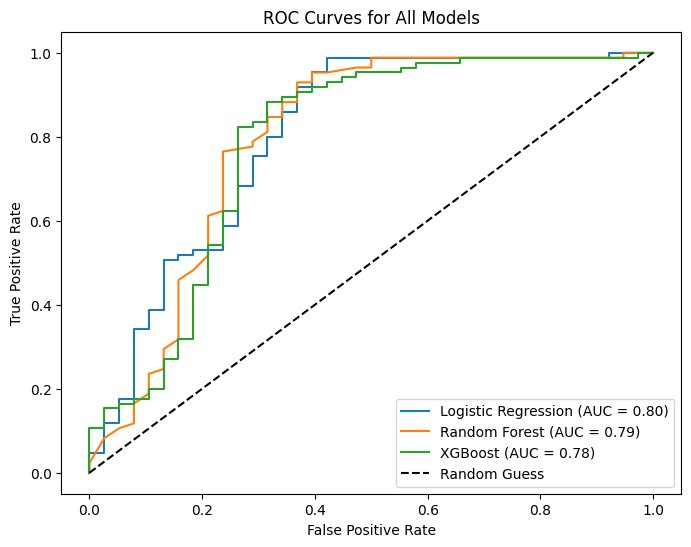

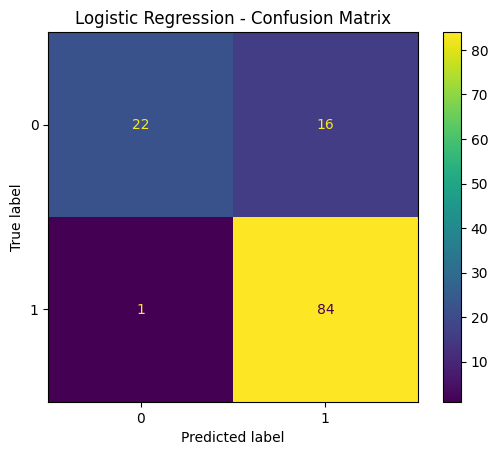

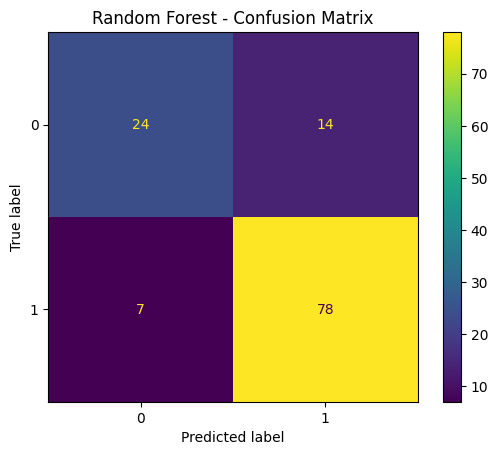

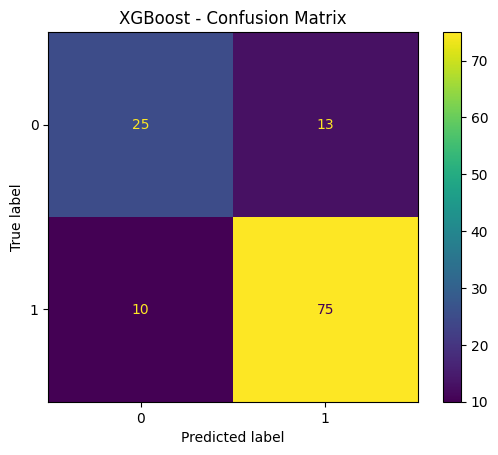

In [12]:
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay

# ROC Curves & Confusion Matrices
plt.figure(figsize=(8, 6))

for name, model in models.items():
    # Get predicted probabilities
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot diagonal line for random guess
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrices
for name, model in models.items():
    y_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f'{name} - Confusion Matrix')
    plt.show()


In [13]:
#10.Save Best Model & Scaler
import os
os.makedirs("final_model", exist_ok=True) 
best_model = models["Logistic Regression"]
joblib.dump(best_model, "final_model/loan_model.pkl")
joblib.dump(scaler, "final_model/scaler.pkl")
print("Model and Scaler saved successfully!")

Model and Scaler saved successfully!


C:\Users\jamun\AppData\Local\Temp\ipykernel_22924\2219579580.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=log_reg_df, palette="coolwarm")


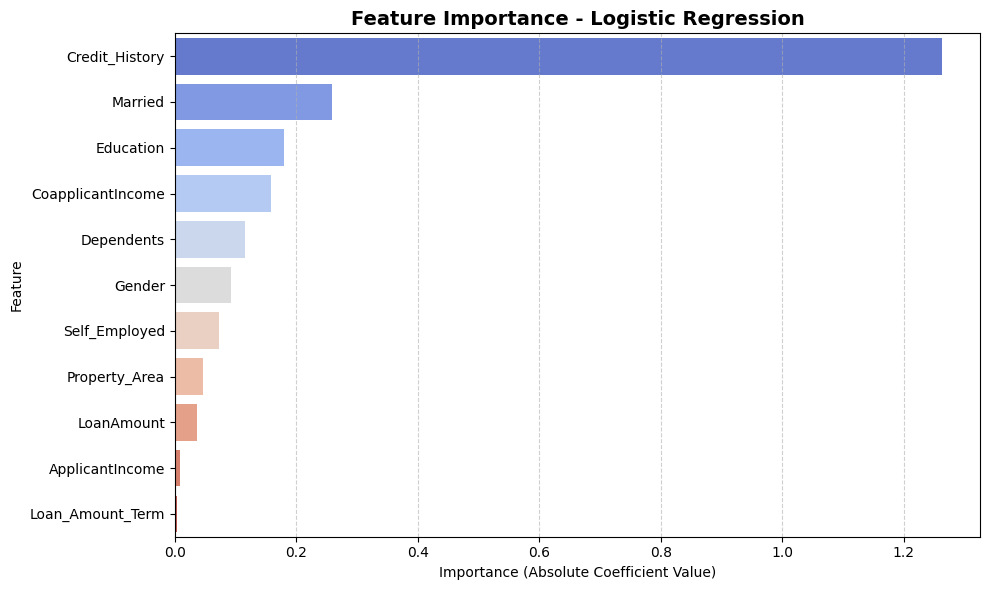

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your feature names
feature_names = X.columns  # Replace X with your features DataFrame

# Example: Using Logistic Regression (best model)
import numpy as np
log_reg_importance = np.abs(best_model.coef_[0])  # Coefficients
log_reg_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": log_reg_importance
}).sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=log_reg_df, palette="coolwarm")
plt.title("Feature Importance - Logistic Regression", fontsize=14, weight="bold")
plt.xlabel("Importance (Absolute Coefficient Value)")
plt.ylabel("Feature")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\jamun\AppData\Local\Temp\ipykernel_22924\1148663914.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


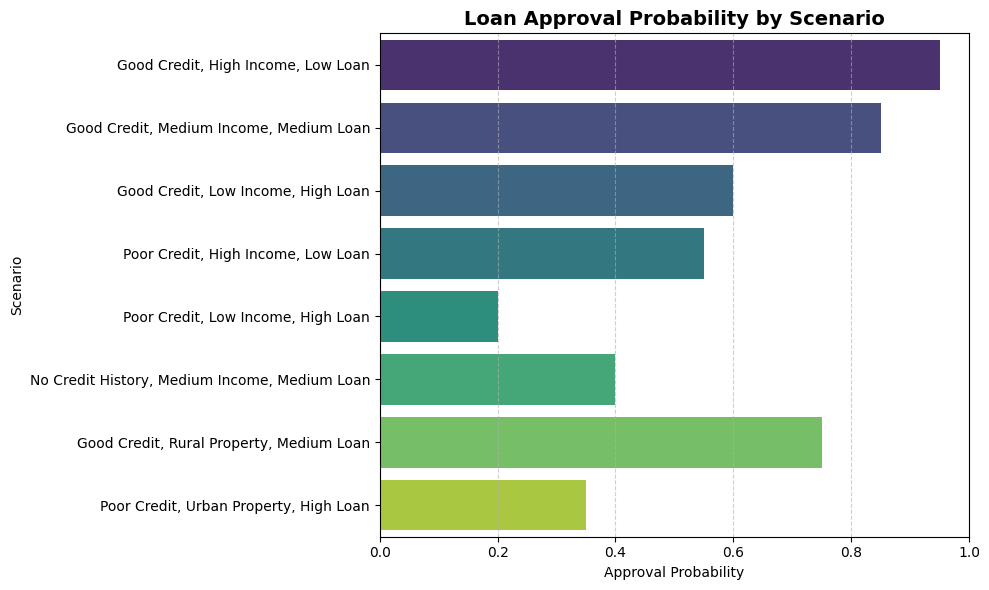

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data showing different situations and approval probability
data = [
    ["Good Credit, High Income, Low Loan", "High", 0.95],
    ["Good Credit, Medium Income, Medium Loan", "Medium", 0.85],
    ["Good Credit, Low Income, High Loan", "Low", 0.60],
    ["Poor Credit, High Income, Low Loan", "Medium", 0.55],
    ["Poor Credit, Low Income, High Loan", "Very Low", 0.20],
    ["No Credit History, Medium Income, Medium Loan", "Low", 0.40],
    ["Good Credit, Rural Property, Medium Loan", "Medium", 0.75],
    ["Poor Credit, Urban Property, High Loan", "Low", 0.35]
]

# Create DataFrame
df = pd.DataFrame(data, columns=["Scenario", "Approval Category", "Approval Probability"])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Approval Probability",
    y="Scenario",
    data=df,
    palette="viridis"
)
plt.title("Loan Approval Probability by Scenario", fontsize=14, weight="bold")
plt.xlabel("Approval Probability")
plt.ylabel("Scenario")
plt.xlim(0, 1)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()
